In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import umap

In [3]:
sns.set_theme(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [4]:
# load dataset
spotify_df = pd.read_csv("/Users/str1ct0wn3r/Documents/RP/data/Processed_data/Spotify_Subset/track_features_with_track_id.csv")

spotify_df = spotify_df[spotify_df['danceability'] != -1]

#print(spotify_df['key'].max(), spotify_df['key'].min())

spotify_df.head()

,track_id,spotify_uri,danceability,energy,instrumentalness,acousticness,tempo,valence,key,liveness,loudness,mode,speechiness,time_signature
0,47511869,4wCmqSrbyCgxEXROQE6vtV,0.864,0.495,0.000133,0.5910,129.062,0.720,0,0.0992,-7.036,1,0.0370,4
1,32496162,4G8gkOterJn0Ywt6uhqbhp,0.448,0.784,0.000108,0.0999,136.239,0.237,9,0.6680,-3.686,1,0.0625,4
2,33614747,1c8gk2PeTE04A1pIDH9YMk,0.730,0.769,0.000000,0.1380,104.948,0.507,8,0.0473,-5.114,1,0.0298,4
3,32083560,7w87IxuO7BDcJ3YUqCyMTT,0.733,0.710,0.115000,0.1450,127.975,0.965,5,0.0956,-5.849,0,0.0292,4
4,45222862,6mFkJmJqdDVQ1REhVfGgd1,0.481,0.262,0.011400,0.7350,122.861,0.375,7,0.8320,-15.730,1,0.0414,4


In [5]:
# get only children songs

children_songs_only = pd.read_csv("/Users/str1ct0wn3r/Documents/RP/data/Filtered_Data/left_songs.csv")

to_keep = set()

for x in children_songs_only['track_id']:
    to_keep.add(x)

spotify_df = spotify_df[spotify_df['track_id'].isin(to_keep)]

spotify_df.reset_index(inplace=True)

print(len(spotify_df))

844339


In [6]:
from sklearn.decomposition import PCA

reducer = umap.UMAP(n_components=2)
#pca = PCA(n_components=2, svd_solver='full')


In [7]:
#one hot encode the key
one_hot_encoded = pd.get_dummies(spotify_df, columns=['key'], dtype='int')
#one_hot_encoded = spotify_df

one_hot_encoded

,index,track_id,spotify_uri,danceability,energy,instrumentalness,acousticness,tempo,valence,liveness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0,47511869,4wCmqSrbyCgxEXROQE6vtV,0.864,0.495,0.000133,0.591000,129.062,0.7200,0.0992,...,0,0,0,0,0,0,0,0,0,0
1,1,32496162,4G8gkOterJn0Ywt6uhqbhp,0.448,0.784,0.000108,0.099900,136.239,0.2370,0.6680,...,0,0,0,0,0,0,0,1,0,0
2,3,32083560,7w87IxuO7BDcJ3YUqCyMTT,0.733,0.710,0.115000,0.145000,127.975,0.9650,0.0956,...,0,0,0,1,0,0,0,0,0,0
3,4,45222862,6mFkJmJqdDVQ1REhVfGgd1,0.481,0.262,0.011400,0.735000,122.861,0.3750,0.8320,...,0,0,0,0,0,1,0,0,0,0
4,5,251242,1eyzqe2QqGZUmfcPZtrIyt,0.526,0.712,0.000000,0.016100,105.009,0.3200,0.1790,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844334,2106994,25940230,7eJzvDw5aevgjYsBeQzLPN,0.815,0.535,0.000321,0.013900,150.040,0.9540,0.1070,...,0,0,0,0,0,0,0,0,0,1
844335,2107008,25957395,1wU7thArfjO4SwsPwQOSPG,0.554,0.429,0.000425,0.171000,114.987,0.6270,0.2030,...,0,0,0,0,0,0,0,0,0,0
844336,2107009,25957581,2VifxaGtEp2Gxu753Y8PQQ,0.760,0.685,0.000104,0.014700,193.993,0.7710,0.0918,...,0,0,0,0,0,0,0,1,0,0
844337,2107010,25957755,5JEs2no74V9HkrhFRDcaF1,0.677,0.884,0.000146,0.712000,115.440,0.7500,0.8310,...,0,0,0,0,0,0,0,0,1,0


In [8]:
# scale feature
music_data = one_hot_encoded[["speechiness", "instrumentalness", "valence", "liveness", "energy", "tempo", "danceability", "acousticness"]].values
scaled_music_data = MinMaxScaler().fit_transform(music_data[:,:])

scaled_music_data

array([[3.83022774e-02, 1.33000000e-04, 7.20000000e-01, ...,
        5.19836954e-01, 8.69215292e-01, 5.93373494e-01],
       [6.46997930e-02, 1.08000000e-04, 2.37000000e-01, ...,
        5.48744532e-01, 4.50704225e-01, 1.00301205e-01],
       [3.02277433e-02, 1.15000000e-01, 9.65000000e-01, ...,
        5.15458727e-01, 7.37424547e-01, 1.45582329e-01],
       ...,
       [9.25465839e-02, 1.04000000e-04, 7.71000000e-01, ...,
        7.81366555e-01, 7.64587525e-01, 1.47590361e-02],
       [6.40786749e-02, 1.46000000e-04, 7.50000000e-01, ...,
        4.64970154e-01, 6.81086519e-01, 7.14859438e-01],
       [8.93374741e-02, 0.00000000e+00, 6.45000000e-02, ...,
        5.23880874e-01, 5.09054326e-01, 5.80321285e-04]])

In [11]:
# load embedding
embedding = pd.read_csv("/Users/str1ct0wn3r/Documents/RP/data/Processed_data/Spotify_Subset/embedding.csv").to_numpy()

In [8]:
embedding = reducer.fit_transform(scaled_music_data)
embedding.shape

(844339, 2)

In [10]:
# save embedding as a csv file
pd.DataFrame(embedding).to_csv("/Users/str1ct0wn3r/Documents/RP/data/Processed_data/Spotify_Subset/embedding.csv", index=False)

In [12]:
print(embedding)

[[10.119306   -0.81613016]
 [ 9.42702     7.815593  ]
 [14.878006    1.1621774 ]
 ...
 [14.431945    2.9274442 ]
 [ 9.185338    1.779741  ]
 [ 9.970971    9.449203  ]]


Text(0.5, 1.0, 'Song features embedded in 2D space')

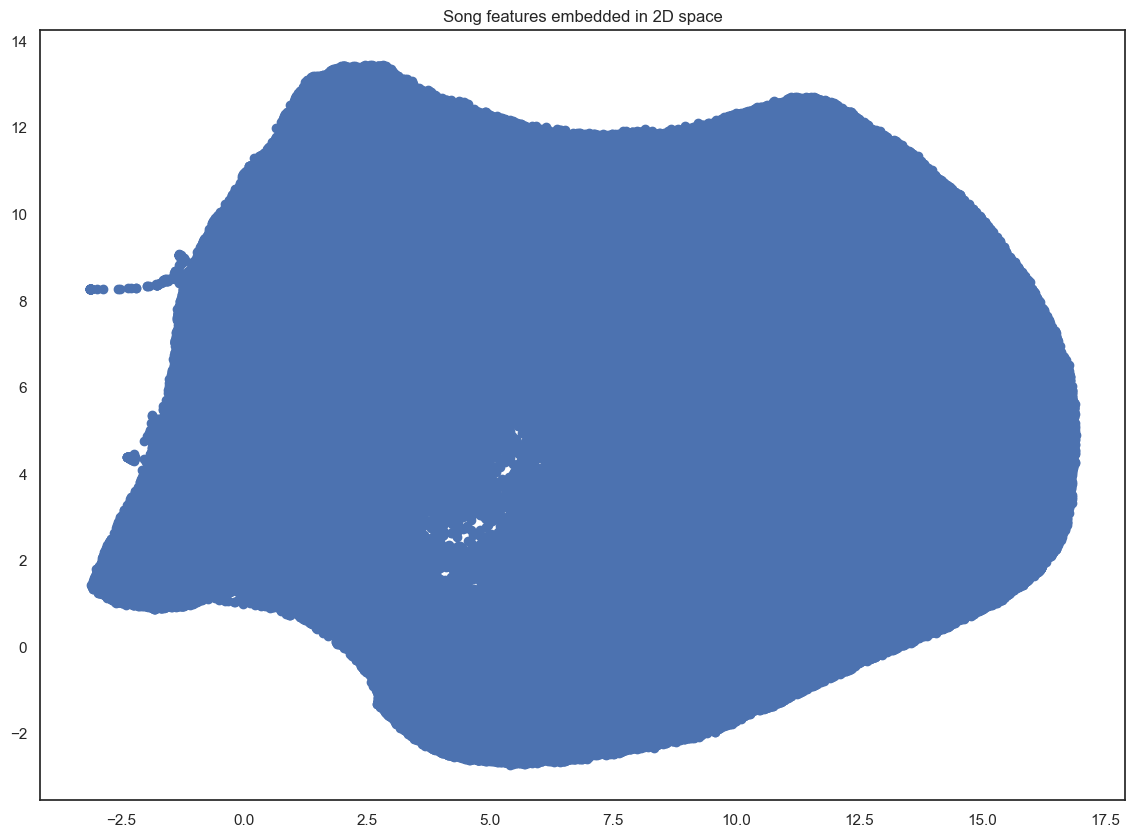

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')

plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
    )
plt.title("Song features embedded in 2D space")

Text(0.5, 1.0, 'Clustering of the songs using k-means algorithm')

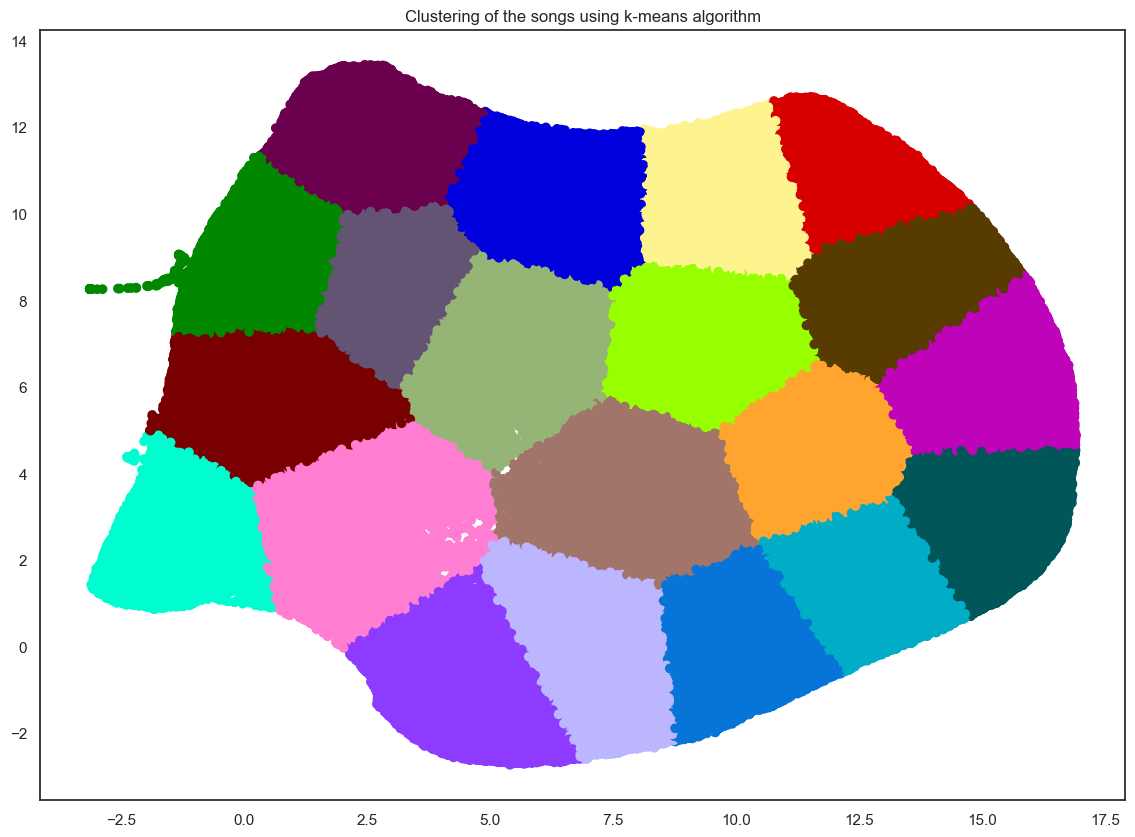

In [14]:
from sklearn.cluster import KMeans
import colorcet as cc

K = 20

kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(embedding)

#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette(cc.glasbey, n_colors=K)[x] for x in kmeans.labels_]
)
plt.title("Clustering of the songs using k-means algorithm")

In [15]:
# load filtered listening events
filtered_df = pd.read_csv('/Users/str1ct0wn3r/Documents/RP/data/Filtered_Data/filtered_listening_events.csv')

filtered_df

,user_id,track_id,listening_count
0,68354,5696512,6
1,68354,9375482,6
2,68354,29424114,2
3,68354,32321441,6
4,68354,32495228,4
...,...,...,...
5455667,109991,20920521,3
5455668,109991,4443419,27
5455669,109991,11106170,17
5455670,109991,26141459,7


In [16]:
print(len(embedding), len(children_songs_only), len(spotify_df))

spotify_df

844339 1012494 844339


,index,track_id,spotify_uri,danceability,energy,instrumentalness,acousticness,tempo,valence,key,liveness,loudness,mode,speechiness,time_signature
0,0,47511869,4wCmqSrbyCgxEXROQE6vtV,0.864,0.495,0.000133,0.591000,129.062,0.7200,0,0.0992,-7.036,1,0.0370,4
1,1,32496162,4G8gkOterJn0Ywt6uhqbhp,0.448,0.784,0.000108,0.099900,136.239,0.2370,9,0.6680,-3.686,1,0.0625,4
2,3,32083560,7w87IxuO7BDcJ3YUqCyMTT,0.733,0.710,0.115000,0.145000,127.975,0.9650,5,0.0956,-5.849,0,0.0292,4
3,4,45222862,6mFkJmJqdDVQ1REhVfGgd1,0.481,0.262,0.011400,0.735000,122.861,0.3750,7,0.8320,-15.730,1,0.0414,4
4,5,251242,1eyzqe2QqGZUmfcPZtrIyt,0.526,0.712,0.000000,0.016100,105.009,0.3200,11,0.1790,-6.525,0,0.0356,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844334,2106994,25940230,7eJzvDw5aevgjYsBeQzLPN,0.815,0.535,0.000321,0.013900,150.040,0.9540,11,0.1070,-11.916,0,0.0621,4
844335,2107008,25957395,1wU7thArfjO4SwsPwQOSPG,0.554,0.429,0.000425,0.171000,114.987,0.6270,0,0.2030,-12.449,1,0.3230,4
844336,2107009,25957581,2VifxaGtEp2Gxu753Y8PQQ,0.760,0.685,0.000104,0.014700,193.993,0.7710,9,0.0918,-4.952,1,0.0894,4
844337,2107010,25957755,5JEs2no74V9HkrhFRDcaF1,0.677,0.884,0.000146,0.712000,115.440,0.7500,10,0.8310,-6.385,1,0.0619,4


Text(0.5, 1.0, 'Tracks listened by a given user inside the clustering(user tracks are in red)')

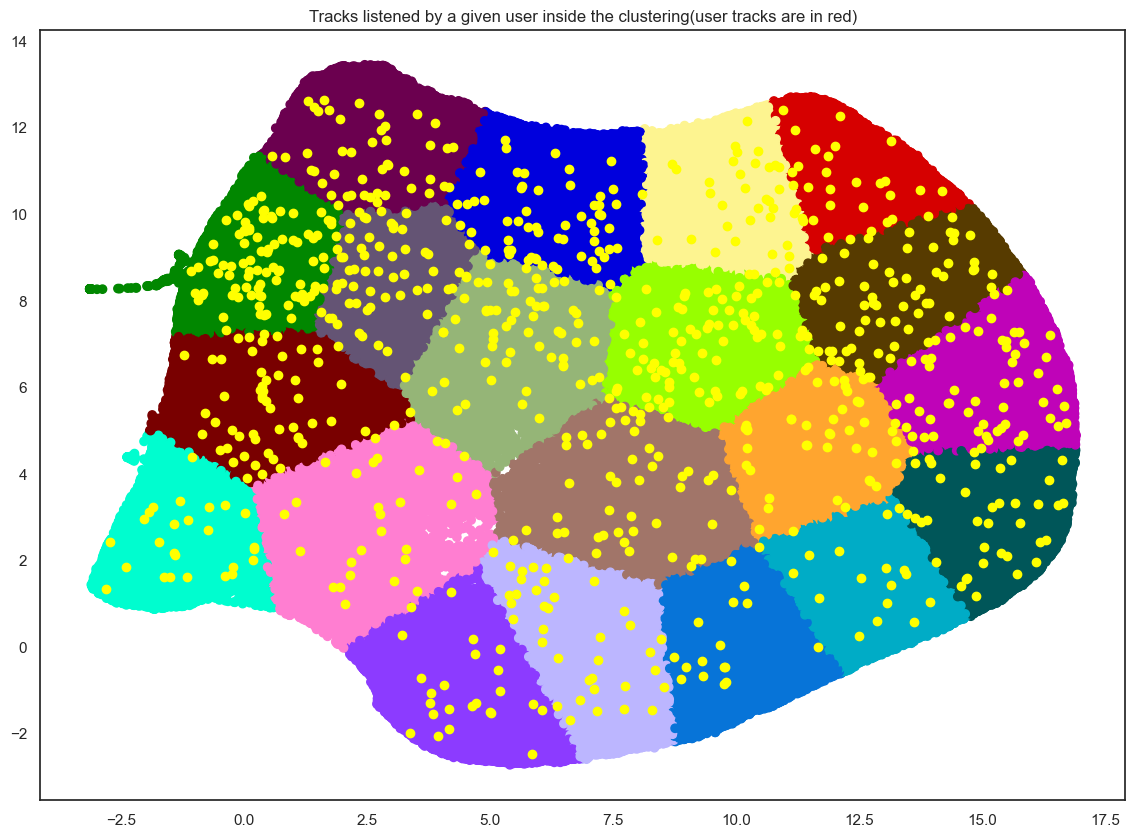

In [17]:
# display a user's listening events on top of the 2D graph

# songs listened by the first user
CUR_USER = 68354
only_current = filtered_df[(filtered_df['user_id'] == CUR_USER) & (filtered_df['listening_count'] > 10)]['track_id']
# get indexes of those songs in embedding
indexes = spotify_df.index[spotify_df['track_id'].isin(only_current)]
#print(indexes)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette(cc.glasbey, n_colors=50)[x] for x in kmeans.labels_]
)
plt.scatter(embedding[indexes, 0],
            embedding[indexes, 1],
            c='yellow')
plt.title("Tracks listened by a given user inside the clustering(user tracks are in red)")

In [16]:
# find the cluster that contains the highest amount of listened songs
def find_cluster(user_id):
    # songs listened by the first user
    only_current = filtered_df[filtered_df['user_id'] == user_id]['track_id']
    
    # get clusters of those songs in embedding
    clusters = kmeans.labels_[spotify_df.index[spotify_df['track_id'].isin(only_current)]]
    
    print("Majority cluster", np.argmax(np.bincount(clusters)))
    print(clusters)
find_cluster(68354)

Majority cluster 3
[ 4  8 16 ...  1 16  1]


In [27]:
# calculate average statistics of a cluster
def calculate_profile(cluster_id):
    #indexes of songs
    #print(np.argwhere(kmeans.labels_ == cluster_id))

    indexes = spotify_df.to_numpy()[np.argwhere(kmeans.labels_ == cluster_id).reshape(-1)]
    #print(np.take(spotify_df, np.argwhere(kmeans.labels_ == cluster_id).reshape(-1), axis=0))
    print(indexes)
    print(spotify_df)
calculate_profile(3)

[[112 3914037 '2374M0fQpWi3dLnB54qaLX' ... 1 0.0323 4]
 [141 15656770 '4BP3uh0hFLFRb5cjsgLqDh' ... 1 0.0374 4]
 [220 43957782 '5r5cp9IpziiIsR6b93vcnQ' ... 0 0.0458 4]
 ...
 [2106915 25754478 '08Pg5KR3oXzwBMUHfGJ6Sx' ... 1 0.118 4]
 [2106994 25940230 '7eJzvDw5aevgjYsBeQzLPN' ... 0 0.0621 4]
 [2107008 25957395 '1wU7thArfjO4SwsPwQOSPG' ... 1 0.323 4]]
          index  track_id             spotify_uri  danceability  energy  \
0             0  47511869  4wCmqSrbyCgxEXROQE6vtV         0.864   0.495   
1             1  32496162  4G8gkOterJn0Ywt6uhqbhp         0.448   0.784   
2             3  32083560  7w87IxuO7BDcJ3YUqCyMTT         0.733   0.710   
3             4  45222862  6mFkJmJqdDVQ1REhVfGgd1         0.481   0.262   
4             5    251242  1eyzqe2QqGZUmfcPZtrIyt         0.526   0.712   
...         ...       ...                     ...           ...     ...   
844334  2106994  25940230  7eJzvDw5aevgjYsBeQzLPN         0.815   0.535   
844335  2107008  25957395  1wU7thArfjO4SwsPwQOSPG